<a href="https://colab.research.google.com/github/d9249/Lotto/blob/main/2021/06/17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
%cd drive/MyDrive/Colab Notebooks/Lotto

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/Lotto'
/content/drive/MyDrive/Colab Notebooks/Lotto


In [31]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

main_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin"
basic_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo="

def GetLast():
    resp = requests.get(main_url)
    soup = BeautifulSoup(resp.text, "lxml")
    result = str(soup.find("meta", {"id" : "desc", "name" : "description"})['content']) # meta
    s_idx = result.find(" ")
    e_idx = result.find("회")
    return int(result[s_idx + 1 : e_idx])

def Crawler(s_count, e_count, fp):
    for i in range(s_count , e_count + 1):
        crawler_url = basic_url + str(i)
        resp = requests.get(crawler_url)
        soup = BeautifulSoup(resp.text, "html.parser")

        text = soup.text

        s_idx = text.find(" 당첨결과")
        s_idx = text.find("당첨번호", s_idx) + 4
        e_idx = text.find("보너스", s_idx)
        numbers = text[s_idx:e_idx].strip().split()

        s_idx = e_idx + 3
        e_idx = s_idx + 3
        bonus = text[s_idx:e_idx].strip()

        s_idx = text.find("1등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money1 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("2등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money2 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("3등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money3 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("4등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money4 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("5등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money5 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        line = str(i) + ',' + numbers[0] + ',' + numbers[1] + ',' + numbers[2] + ',' + numbers[3] + ',' + numbers[4] + ',' + numbers[5] + ',' + bonus + ',' + money1 + ',' + money2 + ',' + money3 + ',' + money4 + ',' + money5
        print(line)
        line += '\n'
        fp.write(line)

last = GetLast()

fp = open('lotto.csv', 'w')
Crawler(1, last, fp)
fp.close()

1,10,23,29,33,37,40,16,0,143934100,5140500,113400,10000
2,9,13,21,25,32,42,2,2002006800,94866800,1842000,100800,10000
3,11,16,19,21,27,31,30,2000000000,0,1174100,54900,10000
4,14,27,30,31,40,42,2,0,211191200,7282400,152100,10000
5,16,24,29,40,41,42,3,0,0,6033800,166500,10000
6,14,15,26,27,40,42,34,6574451700,196297600,4267300,87600,10000
7,2,9,16,25,26,40,42,0,48165000,1605500,65500,10000
8,8,19,25,34,37,39,9,0,131555000,2268100,110500,10000
9,2,4,16,17,36,39,14,0,769456500,8743800,260000,10000
10,9,25,30,33,41,44,6,6430437900,40813400,856400,27300,10000
11,1,7,36,37,41,42,14,4780152300,362132700,9307100,206800,10000
12,2,11,21,25,39,45,44,1348845700,99914400,1417500,70200,10000
13,22,23,25,37,38,42,26,0,433309300,5777400,175600,10000
14,2,6,12,31,33,40,15,9375048300,130363400,2568700,93900,10000
15,3,4,16,30,31,37,13,17014245000,177231700,5571100,144600,10000
16,6,7,24,37,38,40,33,4377146100,243174700,3385200,123500,10000
17,3,4,9,17,32,37,1,5349491200,297193900,2342100,86700,10000
18

In [32]:
import numpy as np

dataset = np.loadtxt("./lotto.csv", delimiter=",")

In [33]:
def numbers2ohbin(numbers):

    ohbin = np.zeros(45)
    for i in range(6):
        ohbin[int(numbers[i])-1] = 1
    
    return ohbin

In [34]:
#dataset = dataset[:-1]

total_count = len(dataset)

print('total_count {0}'.format(total_count))

numbers = dataset[:, 1:7]
samples = list(map(numbers2ohbin, numbers))

x_train = samples[0:total_count-1]
y_train = samples[1:total_count]


'''

x_val = x_train
y_val = y_train

x_test = x_train
x_test = y_train


x_train = samples[0:700]
y_train = samples[1:701]
x_val = samples[700:800]
y_val = samples[701:801]
x_test = samples[800:total_count-1]
y_test = samples[801:total_count]
'''

total_count 967


'\n\nx_val = x_train\ny_val = y_train\n\nx_test = x_train\nx_test = y_train\n\n\nx_train = samples[0:700]\ny_train = samples[1:701]\nx_val = samples[700:800]\ny_val = samples[701:801]\nx_test = samples[800:total_count-1]\ny_test = samples[801:total_count]\n'

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
print('Train...')

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(100):

    mean_train_loss = []
    mean_train_acc = []
    
    model.reset_states()

    for i in range(len(x_train)):
        
        xs = x_train[i].reshape(1, 1, 45)
        ys = y_train[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys)

        mean_train_loss.append(loss)
        mean_train_acc.append(acc)

    train_loss.append(np.mean(mean_train_loss))
    train_acc.append(np.mean(mean_train_acc))

    '''
    mean_val_loss = []
    mean_val_acc = []

    for i in range(len(x_val)):

        xs = x_val[i].reshape(1, 1, 45)
        ys = y_val[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys)
        
        mean_val_loss.append(loss)
        mean_val_acc.append(acc)

    val_loss.append(np.mean(mean_val_loss))
    val_acc.append(np.mean(mean_val_acc))

    print('epoch {0:2d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(mean_train_acc), np.mean(mean_train_loss), np.mean(mean_val_acc), np.mean(mean_val_loss)))
    '''

    print('epoch {0:2d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(mean_train_acc), np.mean(mean_train_loss)))

Train...
epoch  0 train acc 0.864 loss 0.405
epoch  1 train acc 0.867 loss 0.396
epoch  2 train acc 0.867 loss 0.394
epoch  3 train acc 0.867 loss 0.391
epoch  4 train acc 0.867 loss 0.388
epoch  5 train acc 0.867 loss 0.384
epoch  6 train acc 0.867 loss 0.379
epoch  7 train acc 0.867 loss 0.375
epoch  8 train acc 0.867 loss 0.370
epoch  9 train acc 0.867 loss 0.365
epoch 10 train acc 0.867 loss 0.359
epoch 11 train acc 0.868 loss 0.352
epoch 12 train acc 0.868 loss 0.345
epoch 13 train acc 0.869 loss 0.337
epoch 14 train acc 0.870 loss 0.329
epoch 15 train acc 0.872 loss 0.320
epoch 16 train acc 0.874 loss 0.310
epoch 17 train acc 0.877 loss 0.301
epoch 18 train acc 0.881 loss 0.291
epoch 19 train acc 0.885 loss 0.281
epoch 20 train acc 0.889 loss 0.271
epoch 21 train acc 0.893 loss 0.260
epoch 22 train acc 0.898 loss 0.251
epoch 23 train acc 0.902 loss 0.241
epoch 24 train acc 0.908 loss 0.231
epoch 25 train acc 0.913 loss 0.222
epoch 26 train acc 0.917 loss 0.212
epoch 27 train acc 

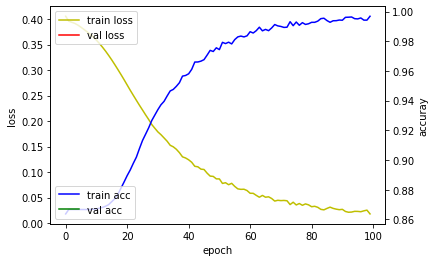

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [39]:
model.save('model.h5')

In [ ]:
import numpy as np
from tensorflow.keras import models

#model = models.load_model('model.h5')

In [44]:
import numpy as np
from tensorflow.keras import models

mean_prize = [ np.mean(dataset[87:, 8]),
           np.mean(dataset[87:, 9]),
           np.mean(dataset[87:, 10]),
           np.mean(dataset[87:, 11]),
           np.mean(dataset[87:, 12])]

print(mean_prize)           

[2436034196.4363637, 57207190.65568182, 1451490.0829545455, 52807.92954545454, 5000.0]


In [45]:
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return mean_prize[0], count
    elif count == 5 and true_bonus in pred_numbers:
        return mean_prize[1], count
    elif count == 5:
        return mean_prize[2], count
    elif count == 4:
        return mean_prize[3], count
    elif count == 3:
        return mean_prize[4], count

    return 0, count

In [46]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        #print('{0} {1} {2}'.format(len(ball_box), ball_index, ball))

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [47]:
model.reset_states()

gi = 1

rewards = []

for i in range(len(x_train)):
    xs = x_train[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)
    
    sum_rewards = 0

    print('No.{0:3d} True Numbers {1}'.format(gi+1, dataset[gi,1:7]))
    
    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        reward, count = calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)
        
        print('{0:2d} {1:15,d} {2:4d} {3}'.format(n, int(reward), count, numbers))

        sum_rewards += reward
    
    print('Total Reward: {0:15,d}'.format(int(sum_rewards)))

    rewards.append(sum_rewards)
    gi += 1
'''
for i in range(len(x_val)):
    xs = x_val[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)

    sum_rewards = 0
    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)

    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))
    rewards.append(sum_rewards)
    gi += 1

for i in range(len(x_test)):
    xs = x_test[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)

    sum_rewards = 0

    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)

    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))
    rewards.append(sum_rewards)
    gi += 1
'''    

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 3   2,436,034,196    6 [3, 44, 27, 20, 24, 6]
 4   2,436,034,196    6 [24, 20, 44, 27, 6, 3]
 5   2,436,034,196    6 [3, 6, 44, 27, 24, 20]
 6       1,451,490    5 [24, 20, 3, 29, 27, 6]
 7   2,436,034,196    6 [27, 20, 44, 6, 24, 3]
 8   2,436,034,196    6 [27, 20, 6, 24, 3, 44]
 9       1,451,490    5 [44, 15, 3, 24, 6, 27]
Total Reward:  14,622,011,138
No.552 True Numbers [ 1. 10. 20. 32. 35. 40.]
 0       1,451,490    5 [32, 35, 40, 1, 20, 12]
 1       1,451,490    5 [10, 40, 20, 1, 32, 33]
 2       1,451,490    5 [20, 33, 40, 35, 10, 32]
 3          52,807    4 [41, 10, 40, 35, 32, 33]
 4       1,451,490    5 [35, 33, 10, 1, 40, 20]
 5          52,807    4 [1, 43, 33, 40, 20, 10]
 6   2,436,034,196    6 [1, 32, 20, 40, 35, 10]
 7          52,807    4 [1, 20, 33, 35, 41, 32]
 8       1,451,490    5 [35, 20, 10, 32, 40, 34]
 9   2,436,034,196    6 [35, 1, 32, 10, 20, 40]
Total Reward:   4,879,484,267
No.553 True Numbers [ 2.  7. 17. 28. 29. 39.]


"\nfor i in range(len(x_val)):\n    xs = x_val[i].reshape(1, 1, 45)\n    ys_pred = model.predict_on_batch(xs)\n\n    sum_rewards = 0\n    for n in range(10):\n        numbers = gen_numbers_from_probability(ys_pred[0])\n        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)\n\n    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))\n    rewards.append(sum_rewards)\n    gi += 1\n\nfor i in range(len(x_test)):\n    xs = x_test[i].reshape(1, 1, 45)\n    ys_pred = model.predict_on_batch(xs)\n\n    sum_rewards = 0\n\n    for n in range(10):\n        numbers = gen_numbers_from_probability(ys_pred[0])\n        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)\n\n    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))\n    rewards.append(sum_rewards)\n    gi += 1\n"

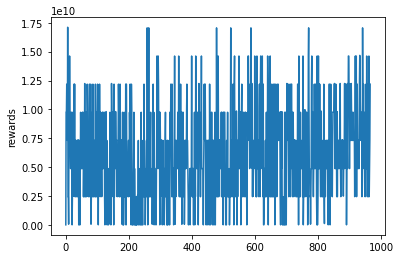

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.ylabel('rewards')
plt.show()

In [49]:
print('receive numbers')

xs = samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(10):
    numbers = gen_numbers_from_probability(ys_pred[0])
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)

receive numbers
0 : [42, 45, 41, 3, 8, 27]
1 : [8, 41, 31, 15, 42, 3]
2 : [41, 8, 29, 30, 3, 21]
3 : [3, 30, 18, 15, 37, 8]
4 : [42, 41, 33, 8, 3, 9]
5 : [8, 41, 29, 36, 30, 12]
6 : [3, 35, 42, 45, 41, 30]
7 : [3, 8, 41, 42, 24, 35]
8 : [3, 41, 40, 45, 8, 29]
9 : [11, 3, 24, 45, 35, 10]


In [50]:
print(list_numbers[0])
print(list_numbers[1])
print(list_numbers[2])
print(list_numbers[3])
print(list_numbers[4])
print(list_numbers[5])
print(list_numbers[6])
print(list_numbers[7])
print(list_numbers[8])
print(list_numbers[9])

[42, 45, 41, 3, 8, 27]
[8, 41, 31, 15, 42, 3]
[41, 8, 29, 30, 3, 21]
[3, 30, 18, 15, 37, 8]
[42, 41, 33, 8, 3, 9]
[8, 41, 29, 36, 30, 12]
[3, 35, 42, 45, 41, 30]
[3, 8, 41, 42, 24, 35]
[3, 41, 40, 45, 8, 29]
[11, 3, 24, 45, 35, 10]


In [53]:
print(list_numbers.sort())
print(list_numbers[0].sort())
print(list_numbers[1].sort())
print(list_numbers[2].sort())
print(list_numbers[3].sort())
print(list_numbers[4].sort())
print(list_numbers[5].sort())
print(list_numbers[6].sort())
print(list_numbers[7].sort())
print(list_numbers[8].sort())
print(list_numbers[9].sort())

None
None
None
None
None
None
None
None
None
None
None


In [52]:


print('rewards check')
total_rewards = 0

for n in range(len(list_numbers)):
    reward, count = calc_reward([19,32,37,40,41,43], [45], list_numbers[n])
    print('{0} {1:15,d}'.format(count, int(reward)))
    total_rewards += reward

print('Total {0:15,d}'.format(int(total_rewards)))

rewards check
1               0
1               0
1               0
1               0
1               0
1               0
1               0
1               0
2               0
0               0
Total               0
